In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [2]:
%run ../../Utilities.ipynb

Using TensorFlow backend.


In [3]:
path = "../../../Samples/Guitar/Chords/"
data = pd.read_excel("../../../Data/Guitar/chords.xlsx")

In [4]:
data["x"] = data["Chord"].progress_apply(lambda x: waveform(path + x).y[:4000])

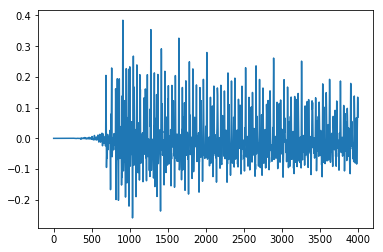

In [6]:
import matplotlib.pyplot as plt
plt.plot(data["x"].sample().values[0])

In [7]:
def to_spectral(x, samples):
    xf = np.zeros((x.shape[0] // samples, samples))
    for i in range(0, x.shape[0] - samples, samples):
        w = abs(np.fft.fft(x[i:i+samples], n=samples*2))
        freqs = np.fft.fftfreq(len(w))
        xf[i//samples, :] = w[freqs >= 0]
    return xf

In [8]:
data["xf"] = data["x"].progress_apply(lambda x: to_spectral(x, 100))

In [9]:
data["xf"].apply(lambda x: x.shape)[0]

(40, 100)

In [10]:
data["Notes"] = data["Notes"].apply(lambda x: np.array(x.split(",")).astype(int))

In [11]:
data.to_pickle("../../../Data/Guitar/real_chords.pkl")